# How well do the Top 6 Data Jobs paid in the US?

## Procedure
1. Filter the dataframe into United States and drop NaN values for the salary year avg
2. Obtain the Top 6 data jobs and create a job_order in descending order
3. Plot the boxplot using Seaborn to observe the distribution of the salary for the Top 6 Data jobs

In [ ]:
# Import the necessary library
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])


# Data Cleanup form a strings to list
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df_US = df[(df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])
# I wanted the Top6 data jobs in the US and make it into a list 
job_titles = df_US['job_title_short'].value_counts().index[:6].tolist()
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]

In [ ]:
# Create the order to descending order
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index
job_order

Index(['Senior Data Scientist', 'Senior Data Engineer', 'Data Scientist',
       'Data Engineer', 'Senior Data Analyst', 'Data Analyst'],
      dtype='object', name='job_title_short')

### Key Notes here:
Seaborn boxplot allow us to change the order that we wanted. That why we needed to create a job_order.  
Otherwise, it will become ascending order. 

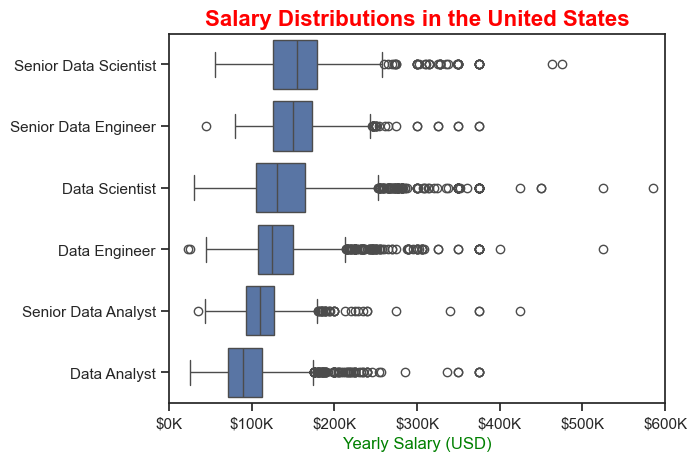

In [14]:
sns.boxplot(data=df_US_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')
plt.title('Salary Distributions in the United States', color='red', fontsize=16, fontweight='bold')
plt.xlabel('Yearly Salary (USD)', color='green')
plt.ylabel('')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

# <span style="color:red; font-weight:bold">Conclusion</span>
- We can see that Senior Data Scientist has the highest yearly salary in the US  

- Moving into Senior Data roles (especially engineering or science tracks) is financially rewarding. 
- Technical depth pays more: Data Scientists and Engineers generally earn more than Analysts.
- Data Analyst has the lowest median salary in the chart. A common entry point into the data field with less variation and lower ceiling unless transitioning to more technical roles. 